## Upload the dataset downloaded fro the github repository

In [1]:
import zipfile

In [2]:
!wget "https://github.com/DSNilaropoly/Nigeria-Native-Fashion-CAP/archive/refs/heads/main.zip"


--2023-03-05 22:22:16--  https://github.com/DSNilaropoly/Nigeria-Native-Fashion-CAP/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/DSNilaropoly/Nigeria-Native-Fashion-CAP/zip/refs/heads/main [following]
--2023-03-05 22:22:16--  https://codeload.github.com/DSNilaropoly/Nigeria-Native-Fashion-CAP/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ]   8.06M  27.9MB/s    in 0.3s    

2023-03-05 22:22:16 (27.9 MB/s) - ‘main.zip’ saved [8447586]



In [3]:
zip_ref = zipfile.ZipFile("main.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

for dirpath, dirnames, filenames in os.walk("Nigeria-Native-Fashion-CAP-main"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in Nigeria-Native-Fashion-CAP-main
There are 3 directories and 0 images in Nigeria-Native-Fashion-CAP-main/test
There are 0 directories and 50 images in Nigeria-Native-Fashion-CAP-main/test/Yoruba
There are 0 directories and 50 images in Nigeria-Native-Fashion-CAP-main/test/Igbo
There are 0 directories and 50 images in Nigeria-Native-Fashion-CAP-main/test/Hausa
There are 3 directories and 0 images in Nigeria-Native-Fashion-CAP-main/train
There are 0 directories and 251 images in Nigeria-Native-Fashion-CAP-main/train/Yoruba
There are 0 directories and 252 images in Nigeria-Native-Fashion-CAP-main/train/Igbo
There are 0 directories and 155 images in Nigeria-Native-Fashion-CAP-main/train/Hausa


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "Nigeria-Native-Fashion-CAP-main/train/"
test_dir = "Nigeria-Native-Fashion-CAP-main/test/"

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    rescale=1/255.)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    rescale=1/255.)

print("Training Images")
train_images = train_datagen.flow_from_directory(train_dir,
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode="categorical")
print("Testing Images")
test_images = test_datagen.flow_from_directory(test_dir,
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode="categorical")

Training Images
Found 658 images belonging to 3 classes.
Testing Images
Found 150 images belonging to 3 classes.


In [6]:
train_images.class_indices

{'Hausa': 0, 'Igbo': 1, 'Yoruba': 2}

In [7]:
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf


base_model = VGG19(
    include_top=False,
    weights='imagenet',

)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

x = base_model(inputs)
print(x.shape)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
print(x.shape)

outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)



80134624/80134624 [==============================] - 0s 0us/step
(None, 7, 7, 512)
(None, 512)


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling (Glo  (None, 512)              0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 3)                 1539      
                                                                 
Total params: 20,025,923
Trainable params: 1,539
Non-trainable params: 20,024,384
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_images,
                    epochs=10,
                    steps_per_epoch=len(train_images),
                    validation_data=test_images,
                    validation_steps=int(0.25 * len(test_images)))

Epoch 1/10
21/21 [==============================] - 18s 266ms/step - loss: 1.1077 - accuracy: 0.3982 - val_loss: 1.1266 - val_accuracy: 0.3125
Epoch 2/10
21/21 [==============================] - 3s 156ms/step - loss: 0.9915 - accuracy: 0.4772 - val_loss: 0.9722 - val_accuracy: 0.5312
Epoch 3/10
21/21 [==============================] - 3s 164ms/step - loss: 0.9152 - accuracy: 0.6033 - val_loss: 0.9226 - val_accuracy: 0.5625
Epoch 4/10
21/21 [==============================] - 3s 157ms/step - loss: 0.8462 - accuracy: 0.7067 - val_loss: 0.8176 - val_accuracy: 0.6875
Epoch 5/10
21/21 [==============================] - 3s 159ms/step - loss: 0.7850 - accuracy: 0.7948 - val_loss: 0.7665 - val_accuracy: 0.8438
Epoch 6/10
21/21 [==============================] - 4s 164ms/step - loss: 0.7343 - accuracy: 0.8252 - val_loss: 0.7300 - val_accuracy: 0.7812
Epoch 7/10
21/21 [==============================] - 3s 164ms/step - loss: 0.6904 - accuracy: 0.8480 - val_loss: 0.7132 - val_accuracy: 0.8125
Epoch

In [11]:
model.evaluate(test_images)

5/5 [==============================] - 3s 635ms/step - loss: 0.6117 - accuracy: 0.8533


[0.6117076873779297, 0.8533333539962769]

In [12]:
import matplotlib.pyplot as plt
def plot_model_results(num_epochs, history, key):

    plt.plot(range(num_epochs), history[key])
    plt.plot(range(num_epochs), history['val_' + key])
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.show()

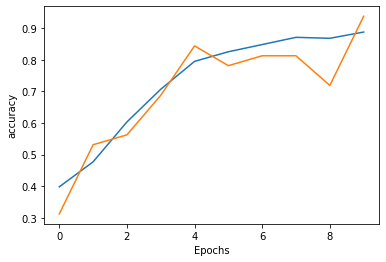

In [14]:
plot_model_results(10, history.history, 'accuracy')

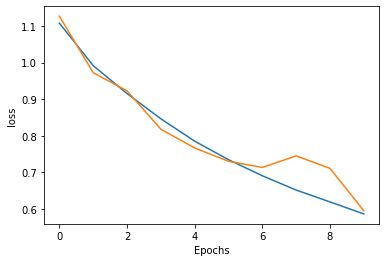

In [15]:
plot_model_results(10, history.history, 'loss')

In [16]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img


In [17]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 48ms/step


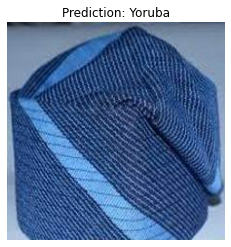

In [26]:
pred_and_plot(model, "Yoruba41.jpg", ["Hausa", "Igbo", "Yoruba"])